# Flask Server
- Python에서 간단하게 사용할 수 있는 web framework

### 필요한 라이브러리 다운로드

In [1]:
# flask 라이브러리 --> 컴퓨터 당 한번만 실행하기 ! 
!pip install flask

In [6]:
# CORS 허용해줄 때 사용하는 라이브러리
!pip install flask_cors

### 필요한 라이브러리 로딩하기

In [1]:
# 1. Flask - 서버를 구동하는데 필요한 Flask 객체 생성
from flask import Flask 
# 2. request - 요청에 대한 값을 꺼내올 때 사용
# 3. redirect - 응답해줄 때 redirect 방식을 사용
# 4. make_response - 응답 객체를 생성할 때 사용
from flask import request, redirect, make_response 
# jsonify --> ajax 요청 응답, json 구조 변환 (필요할 때 사용하기)
# 5. 
from flask_cors import CORS

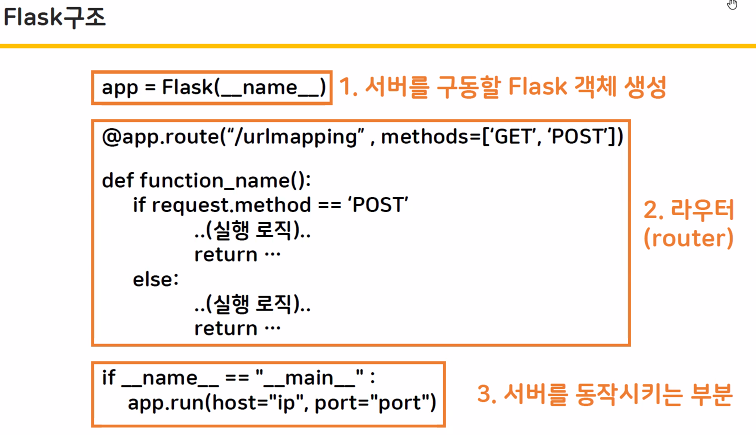

- router : method
- port 번호 9000번대 사용

### Flask Server 구동해보기

CORS(Cross Origin Resource Sharing)
- url : http:localhost:8000/web -요청-> https:172.3.3.1:9000/controller
- 서로 url에서 요청을 보냈을 때 요청 url값이 응답을 보내줘야하는 url값과 상이했을 때 발생할 수 있는 제약조건
- 프로젝트 할 때는 CORS 제약조건을 열어주는 것이 좋다 !

In [ ]:
# 1. Flask 객체 생성하기
app = Flask(__name__)
# CORS 동일출처정책을 허용하는 두번째 방법
CORS(app)

# 2. 라우터 생성하기
# @app.route("urlmapping값", method = [요청방식들])
@app.route("/", methods=["GET"])
def start():
    # CORS 동일출처정책을 허용하는 첫번째 방법
    # response = make_response()
    # response.headers.add("Access-Control-Allow-Origin", "*")
    print('들어오니?')
    
    # GET 방식으로 요청이 들어왔을 때 요청값을 꺼내오는 방법
    cast_name = request.args.get("cast_name")
    print(cast_name)
    
    return '정유진' 
    # 응답값을 되돌려주는 방식! 기본 인코딩 값은 UTF-8
    # return 값 --> 값이 웹페이지 화면에 출력

# POST 방식일때 처리하는 라우터 생성    
@app.route("/post", methods=["POST"])
def start_post():
    # post 방식일 때 요청값을 꺼내오는 방법
    cast_name = request.form.get("cast_name")
    # request.form['cast_name']
    print(cast_name)
    # redirect 방식으로 페이지를 이동하고 싶을 때 사용하는 방법 (다시 register 페이지 보여주기)
    return redirect("http://localhost:8081/web/register?result=임경남")

# 크롤링한 데이터를 반환하는 라우터 생성    
@app.route("/crawling", methods=['POST'])
def get_data():
    # 요청받은 데이터 꺼내오기
    cast_name = request.form.get("cast_name")
    # crawling 함수 실행
    img = crawling(cast_name)
    # register.jsp로 이동하면서 결과값 반환
    return redirect("http://localhost:8081/web/register?img="+str(img))

# 딥러닝 -> blob 방식으로 리턴하는 방법


# 3. Flask 앱 동작시키기 
if __name__ == "__main__":
    # 프로젝트 진행 시에는 flask 담당자 ip주소를 적어줄 것
    # flask 담당자는 방화벽 내려야한다
    # port 번호는 사용하고 있는 컴퓨터의 다른 어플리케이션 port와 중복 XXXXX
    app.run(host = "127.0.0.1", port = "9000")

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/May/2023 09:05:45] "POST /crawling HTTP/1.1" 302 -


In [ ]:
# GET, POST 하나의 url으로 하고 싶을 때
@app.route("/", methods = ["GET", "POST"])
def start():
    if request.method == "GET":
        return "GET 방식"
    else :
        return "POST 방식"

### 크롤링 코드를 함수화 시키기

In [2]:
# 1. 크롤링에 필요한 라이브러리 로딩

from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import pandas as pd


In [3]:
# 크롤링 함수 생성하기
def crawling(cast_name):
    # 2. 크롤링 코드 작성
    # 네이버에서
    driver = wb.Chrome()
    driver.get('https://www.naver.com/')
    #아이유 검색 
    search = driver.find_element(By.ID, 'query')
    search.send_keys(cast_name) # 검색한 데이터를 받아와서 크롤링!
    search.send_keys(Keys.ENTER)
    # 이미지 탭을 눌렀을 때 
    tab = driver.find_element(By.CSS_SELECTOR,"#lnb > div.lnb_group > div > ul > li:nth-child(2) > a")
    tab.click()

    # time.sleep
    time.sleep(5)

    # 첫번째 이미지 src 크롤링
    imgs = driver.find_elements(By.CSS_SELECTOR, "img._image._listImage")
    
    return imgs[0].get_attribute('src')

In [71]:
# 2. 크롤링 코드 작성
# 네이버에서
driver = wb.Chrome()
driver.get('https://www.naver.com/')
#아이유 검색 
search = driver.find_element(By.ID, 'query')
search.send_keys("아이유")
search.send_keys(Keys.ENTER)
# 이미지 탭을 눌렀을 때 
tab = driver.find_element(By.CSS_SELECTOR,"#lnb > div.lnb_group > div > ul > li:nth-child(2) > a")
tab.click()

# time.sleep
time.sleep(5)

# 첫번째 이미지 src 크롤링
imgs = driver.find_elements(By.CSS_SELECTOR, "img._image._listImage")
imgs[0].get_attribute('src')

'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMzA1MTRfMjY3%2FMDAxNjg0MDY0MDA2MTQy.9X1mDMFRwndds0mcgHUEyw2N3CPPc3p5_C8sQe2g9o0g.aF3Xz_Q-UAsb5_T6E0ayCyH0nLV-nklpoEuykrHn6EIg.JPEG.bo752%2FFvsJN51aQAEHNWw.jpeg&type=a340'